<a href="https://colab.research.google.com/github/mostafa-ja/Data-Mining-fall-2023/blob/main/Data_Mining2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import seaborn as sns

In [3]:
import gdown

# our sharable address : https://drive.google.com/file/d/1JFZY6bOua4XvL1t36nNF5hTigotYckIY/view?usp=share_link
# Replace 'your_file_id' with the actual file ID from the shareable link
file_id = '1quMzXrCUCVTHaVTAT26jO-T_HnhSBxtp'

download_link = f'https://drive.google.com/uc?id={file_id}'
output = 'EX_2.zip'
gdown.download(download_link, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1quMzXrCUCVTHaVTAT26jO-T_HnhSBxtp
To: /content/EX_2.zip
100%|██████████| 125M/125M [00:02<00:00, 57.3MB/s]


'EX_2.zip'

In [4]:
!unzip '/content/EX_2.zip' -d "/content/data/"

Archive:  /content/EX_2.zip
  inflating: /content/data/Answer.rar  
  inflating: /content/data/Q_A.rar   
  inflating: /content/data/Questions.rar  
  inflating: /content/data/U.rar     
  inflating: /content/data/tags.rar  
  inflating: /content/data/user_badge.rar  


In [5]:
!unrar x "/content/data/Answer.rar"
!unrar x "/content/data/Q_A.rar"
!unrar x "/content/data/Questions.rar"
!unrar x "/content/data/U.rar"
!unrar x "/content/data/tags.rar"
!unrar x "/content/data/user_badge.rar"


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/data/Answer.rar

Extracting  Answer.csv                                                    20% 40% 61% 81%100%  OK 
All OK

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/data/Q_A.rar

Extracting  Q_A.csv                                                       29% 59% 88%100%  OK 
All OK

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/data/Questions.rar

Extracting  Questions.txt                                                 33% 66% 99%100%  OK 
All OK

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/data/U.rar

Extracting  U.csv                                                        100%  OK 
All OK

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
answers = pd.read_csv('Answer.csv', encoding="utf-16")
answers = answers.drop(0) # remove the meaningless row(the second line)
answers.head(3)

,Id,CreationDate,Score,OwnerUserId,CommentCount,ClosedDate
1,127,2008-08-01 16:13:47.600000000,37.0,35.0,2.0,NaN
2,128,2008-08-01 16:19:04.283000000,7.0,26.0,2.0,NaN
3,133,2008-08-01 16:31:43.430000000,0.0,59.0,1.0,NaN


In [8]:
questions = pd.read_csv('Questions.txt', encoding="utf-16")
questions.head(3)

,Id,CreationDate,Score,ViewCount,OwnerUserId,CommentCount,ClosedDate,FavoriteCount
0,123,2008-08-01 16:08:52,48,44161,78.0,3,NaN,13
1,126,2008-08-01 16:10:30,33,6357,58.0,0,2012-05-08 18:11:27,2
2,382,2008-08-02 08:58:28,28,6827,122.0,1,NaN,4


In [9]:
Q_A = pd.read_csv('Q_A.csv', encoding="utf-16")
Q_A.head(3)

,QId,AId,accepted
0,898405,1153025,0
1,12679343,12679433,0
2,19108614,19786664,0


In [10]:
users = pd.read_csv('U.csv', encoding="utf-16")
users.head(3)

,Id,Reputation,Views,UpVotes,DownVotes
0,1,33107,173080,3225,1299
1,3,10145,18988,5654,100
2,9,8716,3152,42,4


In [11]:
user_badge = pd.read_csv('user_badge.txt', encoding="utf-16")
user_badge.head(3)

,UserId,Name
0,3718,Teacher
1,994,Teacher
2,3893,Teacher


In [12]:
tags = pd.read_csv('tags.txt', sep='\t')
tags.head(3)

,Id,Tags
0,2288942,user-interface
1,4433442,canvas
2,6381190,shortcut


# Question 1

In [15]:
merged_Q_A = pd.merge(questions, Q_A, left_on='Id', right_on='QId', how='inner')
merged_Q_A.head()

,Id,CreationDate,Score,ViewCount,OwnerUserId,CommentCount,ClosedDate,FavoriteCount,QId,AId,accepted
0,123,2008-08-01 16:08:52,48,44161,78.0,3,NaN,13,123,183,1
1,123,2008-08-01 16:08:52,48,44161,78.0,3,NaN,13,123,53547,0
2,123,2008-08-01 16:08:52,48,44161,78.0,3,NaN,13,123,16483567,0
3,123,2008-08-01 16:08:52,48,44161,78.0,3,NaN,13,123,6726,0
4,123,2008-08-01 16:08:52,48,44161,78.0,3,NaN,13,123,21413,0


In [23]:
# Calculating the correlation between 'Column1' and 'Column2'
correlation = merged_Q_A['accepted'].corr(merged_Q_A['ViewCount'])
correlation

-0.04958586435628561

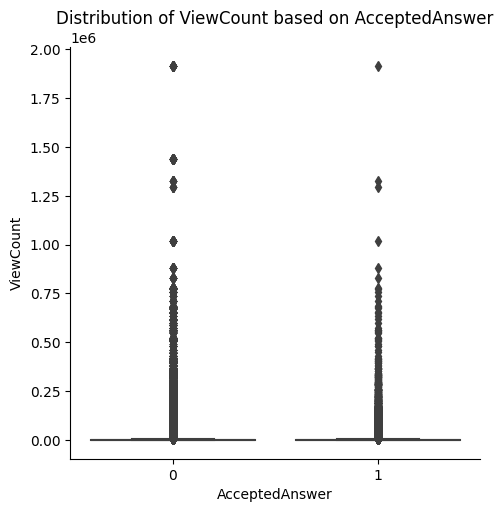

In [30]:
# Using a categorical plot or boxplot to visualize 'ViewCount' based on 'accepted' values
sns.catplot(x='accepted', y='ViewCount', data=merged_Q_A, kind='box')
plt.title('Distribution of ViewCount based on AcceptedAnswer')
plt.xlabel('AcceptedAnswer')
plt.ylabel('ViewCount')
plt.show()

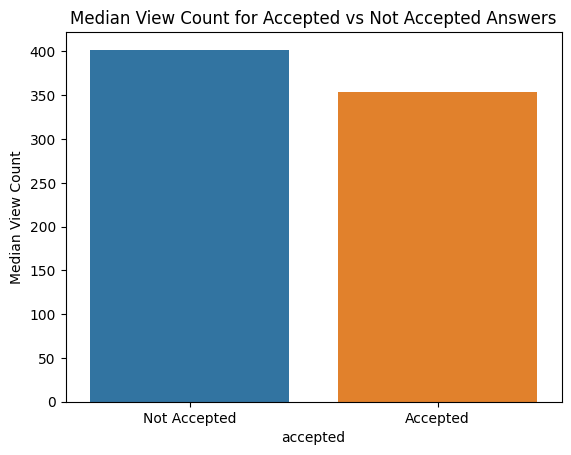

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming merged_Q_A is your DataFrame

# Grouping by 'accepted' and calculating median view count
median_view_count = merged_Q_A.groupby('accepted')['ViewCount'].median()

# Creating a bar plot for median view count of accepted vs not accepted answers
sns.barplot(x=median_view_count.index.map({1: 'Accepted', 0: 'Not Accepted'}), y=median_view_count.values)
plt.ylabel('Median View Count')
plt.title('Median View Count for Accepted vs Not Accepted Answers')
plt.show()


# Question 2

In [32]:
questions.columns

Index(['Id', 'CreationDate', 'Score', 'ViewCount', 'OwnerUserId',
       'CommentCount', 'ClosedDate', 'FavoriteCount'],
      dtype='object')

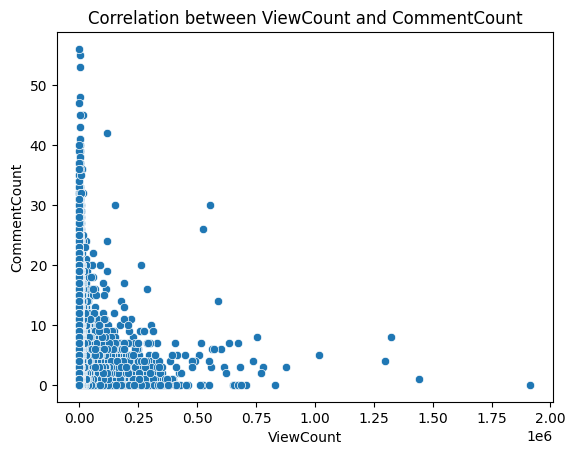

In [34]:
# Plotting correlation between Column1 and Column2
sns.scatterplot(x='ViewCount', y='CommentCount', data=questions)
plt.title('Correlation between ViewCount and CommentCount')
plt.xlabel('ViewCount')
plt.ylabel('CommentCount')
plt.show()

In [35]:
# Calculating the correlation between 'Column1' and 'Column2'
correlation = questions['CommentCount'].corr(questions['ViewCount'])
correlation

-0.007876112266719859